# Relatório de análise de dados Cinematográficos - Indicium
---
---

### 1. Introdução

A industria cinematográfica é uma das mais lucrativas do mundo, com um faturamento anual de bilhões de dólares. Com a crescente demanda por conteúdo de entretenimento, a produção de filmes e séries tem aumentado exponencialmente. Com isso, a concorrência entre os estúdios de cinema tem se tornado cada vez mais acirrada, e a necessidade de se produzir conteúdo de qualidade é cada vez mais evidente. Neste cenário, a análise de dados se torna uma ferramenta essencial para a tomada de decisões, e é nesse contexto que este relatório se insere.

***

### 2. Objetivos

O objetivo deste relatório é analisar dados acerca do mercado de filmes, com o intuito de identificar padrões e tendências que possam ser úteis para a indústria de desenvolvimento e produção de filmes. Para isso, serão analisados dados de filmes, como atores, diretores, faturamento, duração do filme, entre outros. 

***

### 3. Metodologia e Resultados

#### 3.1. Coleta de Dados

Os dados utilizados neste relatório foram fornecidos em um arquivo CSV `desafio_indicium_imdb.csv`, contendo informações sobre filmes, como título, duração, gênero, diretor, atores, faturamento e ano de lançamento

#### 3.2. Análise de Dados

A análises foram realizadas utilizando a biblioteca pandas do Python, que permite a manipulação e análise de dados de forma eficiente. A análise ocorreu de acordo com a as seguintes etapas:

##### 3.2.1 Preparação do ambiente 

In [1]:
# Importação de bibliotecas
# Manipulação de dados
import pandas as pd 
# BVibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
# Padronizar paleta de cores
sns.set_palette('bright')


# evitar poluição visual
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

##### 3.2.2 Carregar os dados do dataset

In [2]:
file_path = 'desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)

In [3]:
# Visualizar as primeiras linhas do dataframe
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### 3.2.3 Visão geral do banco de dados

Os dados fornecidos no arquivo CSV desafio_indicium_imdb.csv contêm informações sobre 999 filmes, distribuídas em 16 colunas. A seguir, apresentamos uma descrição detalhada de cada uma das colunas:

* **Unnamed: 0**: 
Índice dos dados, não é uma coluna útil para análise e pode ser removida.

* **Series_Title**: 
Título do filme.

* **Released_Year**: 
Ano de lançamento do filme. Nota: Pode precisar de conversão para tipo numérico (int) para algumas análises.

* **Certificate**: 
Classificação indicativa do filme. Possui valores nulos (898 entradas não nulas).

* **Runtime**: 
Duração do filme em minutos. Nota: Necessário remover a unidade "min" e converter para tipo numérico (int).

* **Genre**:
Gênero do filme.

* **IMDB_Rating**: 
Avaliação do filme no IMDB.

* **Overview**: 
Resumo do filme.

* **Meta_score**: 
Pontuação do filme no Metacritic. Possui valores nulos (842 entradas não nulas).

* **Director**: 
Nome do diretor do filme.

* **Star1, Star2, Star3, Star4**: 
Nomes dos atores principais do filme.

* **No_of_Votes**: 
Número de votos recebidos no IMDB.

* **Gross**: 
Receita bruta do filme em dólares. Possui valores nulos (830 entradas não nulas). Necessário remover as vírgulas e converter para tipo numérico (int).

In [4]:
# Informações gerais do dados pré-processados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


#### 3.2.4 Tratamento e limpeza de dados

A limpeza dos dados é uma etapa essencial para garantir a qualidade e confiabilidade das análises realizadas. Neste sentido, foram realizadas as seguintes etapas de tratamento e limpeza dos dados:

* Remoção de colunas desnecessárias: A coluna **Unnamed: 0** foi removida;
* Conversão de tipos: As colunas **Released_Year**, **Runtime** e **Gross** foram convertidas para tipos numéricos;
* Tratamento de valores nulos: Colunas **Certificate**, **Meta_score** e **Gross** possuem valores nulos que, para que não prejudiquem as análises, tiveram suas observações removidas;
* Renomeação de colunas: A coluna **Series_Title** foi renomeada para **Movies_Title**.

In [5]:
# Remoção de colunas desnecessárias
df.drop(columns=['Unnamed: 0'], inplace=True)

# Eliminar dados nao numéricos da coluna Released_Year
df = df[df['Released_Year'].str.isnumeric()]

# Renomear coluna de titulos
df.rename(columns={'Series_Title': 'Movies_Title'}, inplace=True)

# Eliminar linhas com valores nulos
df.dropna(inplace=True)

# Preparacao dos dados numéricos
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype(int)

#### 3.2.5 Estatística descritiva

##### 3.2.5.1 Variáveis Categóricas

* **Released_Year** (Ano de Lançamento):

Os filmes no dataset foram lançados ao longo de 82 anos distintos (1930 a 2019), com 2014 sendo o ano mais frequente, indicando um pico na produção de filmes neste ano.

* **Certificate** (Classificação Indicativa):

Existem 12 classificações indicativas distintas, com a classificação "U" (Universal) sendo a mais comum. Isso sugere uma tendência de produzir filmes adequados para todos os públicos, de forma a maximizar o alcance e a audiência.

* **Genre** (Gênero):

O dataset inclui uma diversidade de 172 gêneros, com "Drama" sendo o gênero mais frequente. Isso indica uma popularidade contínua dos dramas no mercado cinematográfico.

* **Director** (Diretor):

Existem 402 diretores distintos representados no dataset. Steven Spielberg é o diretor mais frequente, possuindo em 13 filmes em sua carreira  em direção cinematográfica.

* **Stars** (Atores Principais):

O dataset inclui 1912 atores distintos. Robert De Niro é o ator mais frequente, aparecendo em 16 filmes, o que pode sugeri sua popularidade e reconhecimento no mercado cinematográfico.

In [6]:
# Distribuição de estrelas (colunas 'Star1', 'Star2', 'Star3', 'Star4')
stars = ['Star1', 'Star2', 'Star3', 'Star4']
stars_count = pd.concat([df[star] for star in stars]).describe(include='object')

# Estatísticas descritivas das variáveis categoricas
cat_desc = df.describe(include='object')

# Descartar colunas com valores unicos
cat_desc.drop(columns=['Movies_Title', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4'], inplace=True)

# Unir coluna de estrelas ao dataframe de estatísticas descritivas
cat_desc = pd.concat([cat_desc, stars_count], axis=1)

# Renomear coluna de atores
cat_desc.rename(columns={0: 'Stars'}, inplace=True)

cat_desc

,Released_Year,Certificate,Genre,Director,Stars
count,712,712,712,712,2848
unique,82,12,172,402,1912
top,2014,U,Drama,Steven Spielberg,Robert De Niro
freq,28,182,57,13,16


##### 3.2.5.2 Variáveis Métricas

**Runtime (Duração do Filme):**

A maioria dos filmes tem uma duração média de aproximadamente 124 minutos.
Filmes com durações entre 104 e 136 minutos são comuns, com poucos filmes sendo extremamente curtos (72 minutos) ou muito longos (238 minutos).

**IMDB_Rating (Avaliação no IMDB):**

As avaliações variam de 7.6 a 9.2, com uma média de 7.94, indicando que a maioria dos filmes têm avaliações boas a excelentes.
A distribuição é relativamente estreita, com a maioria dos filmes recebendo avaliações entre 7.7 e 8.1.

**Meta_score (Pontuação no Metacritic):**

A pontuação no Metacritic varia significativamente de 28 a 100, com uma média de 77.15.
A maioria dos filmes tem pontuações altas, entre 69.75 e 86.

**No_of_Votes (Número de Votos no IMDB):**

O número de votos varia amplamente, de 25,229 a mais de 2,3 milhões, com uma média de 353,466.2 votos.
Filmes com mais votos tendem a ser mais populares e visíveis no mercado.

**Gross (Receita Bruta):**

A receita bruta varia drasticamente, com valores entre $1,305 e quase $937 milhões, e uma média de aproximadamente $78.45 milhões.
Filmes com receitas superiores a $102.36 milhões estão no quartil superior, indicando um alto potencial de lucratividade.

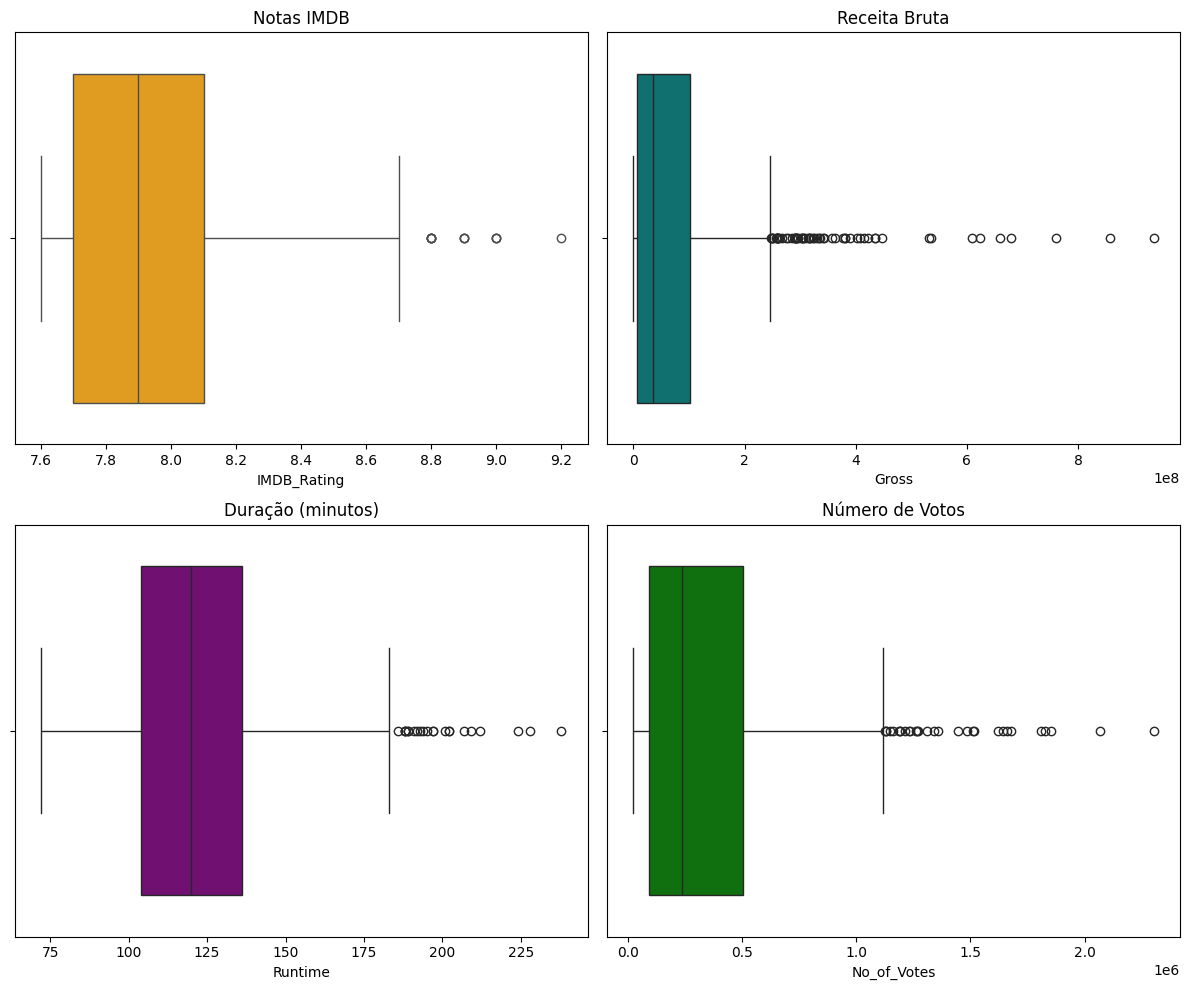

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02
mean,123.667135,7.935674,77.154494,3.534662e+05,7.845017e+07
std,25.907607,0.288928,12.418115,3.464502e+05,1.150686e+08
min,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,104.000000,7.700000,69.750000,9.566475e+04,6.143199e+06
50%,120.000000,7.900000,78.000000,2.359815e+05,3.485015e+07
75%,136.000000,8.100000,86.000000,5.065428e+05,1.023606e+08
max,238.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [7]:
# Estatísticas descritivas
desc_stats = df.describe()

# Boxplot das variáveis métricas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='IMDB_Rating', data=df, ax=axs[0, 0], color='orange').set_title('Notas IMDB')
sns.boxplot(x='Gross', data=df, ax=axs[0, 1], color='teal').set_title('Receita Bruta')
sns.boxplot(x='Runtime', data=df, ax=axs[1, 0], color='purple').set_title('Duração (minutos)')
sns.boxplot(x='No_of_Votes', data=df, ax=axs[1, 1], color='green').set_title('Número de Votos')

plt.tight_layout()
plt.show()

display(desc_stats)

#### 3.2.6 Análise estatística e relação entre variáveis

##### 3.2.6.1 Distribuição das variáveis métricas

As variáveis métricas **Runtime**, **IMDB_Rating**, **Meta_score**, **No_of_Votes** e **Gross** apresentam distribuições assimétricas, com a maioria dos filmes concentrados em valores mais baixos e uma cauda longa em direção a valores mais altos, como pode ser observado no grafico abaixo. Isso sugere que a maioria dos filmes tem avaliações, pontuações, votos e receitas relativamente baixas, com alguns filmes de destaque alcançando valores muito altos.


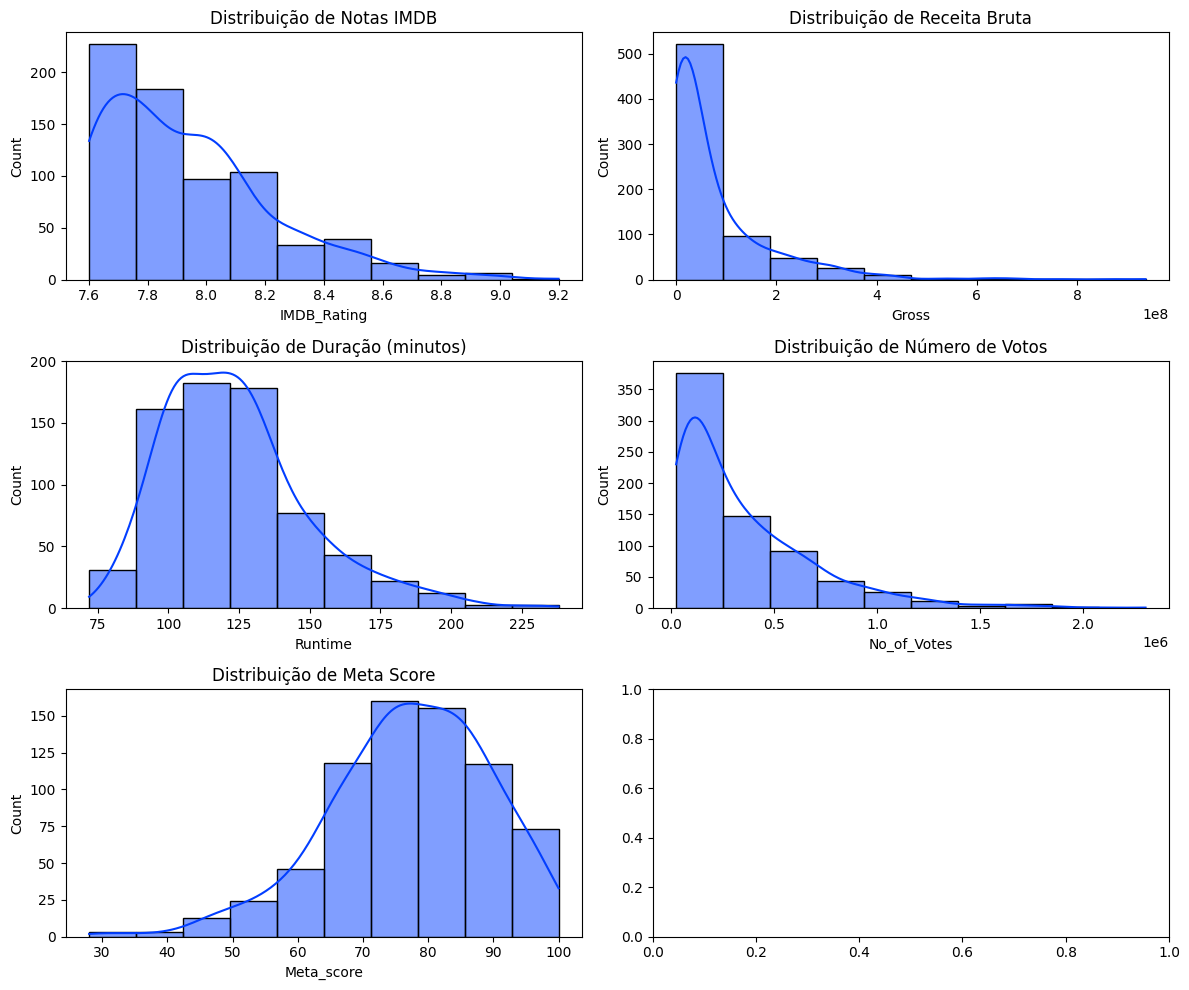

In [8]:
# Isolar as variáveis métricas
numeric_vars = df.select_dtypes(include=['int32', 'int64', 'float64'])

# Distribuilção das variáveis métricas
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

sns.histplot(numeric_vars['IMDB_Rating'], bins=10, kde=True, ax=axs[0, 0]).set_title('Distribuição de Notas IMDB')
sns.histplot(numeric_vars['Gross'].dropna(), bins=10, kde=True, ax=axs[0, 1]).set_title('Distribuição de Receita Bruta')
sns.histplot(numeric_vars['Runtime'], bins=10, kde=True, ax=axs[1, 0]).set_title('Distribuição de Duração (minutos)')
sns.histplot(numeric_vars['No_of_Votes'], bins=10, kde=True, ax=axs[1, 1]).set_title('Distribuição de Número de Votos')
sns.histplot(numeric_vars['Meta_score'], bins=10, kde=True, ax=axs[2, 0]).set_title('Distribuição de Meta Score')

plt.tight_layout()
plt.show()

##### 3.2.6.2 Análise de Correlação entre variáveis métricas

A análise de correlação foi realizada utilizando o coeficiente de correlação de Pearson, que mede a força e a direção da relação linear entre duas variáveis contínuas. Os resultados podem variar de -1 a 1, onde: 

* 1 indica uma correlação positiva perfeita;
* -1 indica uma correlação negativa perfeita;
* 0 indica ausência de correlação.

Das correlações entre as variáveis métricas do dataset, as que aparesentaram correlação moderada a forte foram:

* **Notas IMDB** e **Número de Votos**: Correlação positiva moderada (0.61), indicando que filmes com avaliações mais altas tendem a receber mais votos.

* **Receita Bruta** e **Número de Votos**: Correlação positiva moderada (0.56), indicando que filmes com mais votos tendem a ter uma receita bruta mais alta.



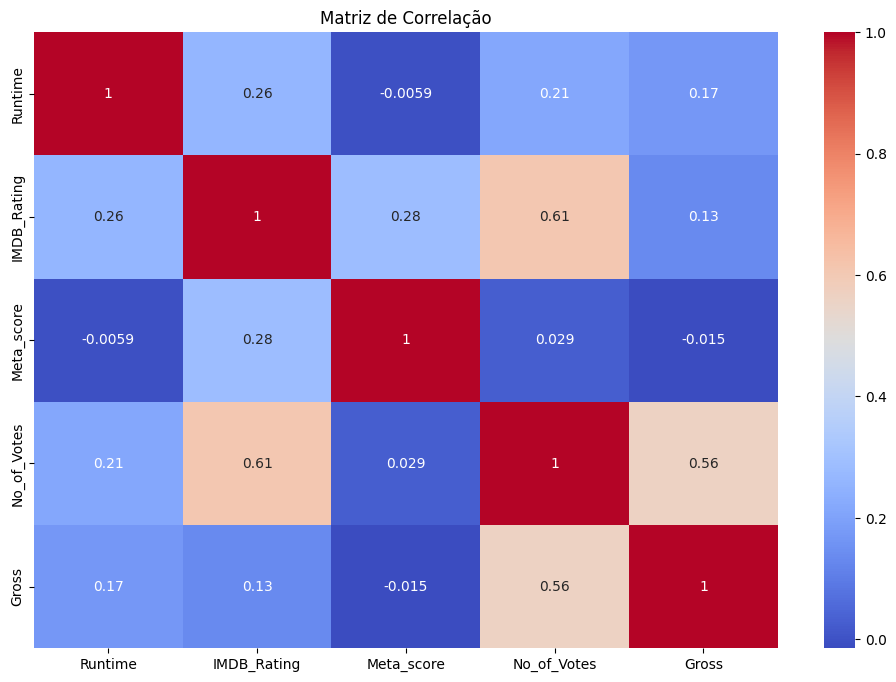

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_vars.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set_title('Matriz de Correlação')
plt.show()

##### 3.2.6.3 Investigacao de padrões e tendencias em filmes de alta receita

Para investigar padrões e tendências as análises foram realizadas com base na Receita Bruta Média e Número médio de Votos por Diretor, Gênero, Atores Principais, Classificação e Duração. Os resultados obtidos foram:

* **Diretor**:

Os diretores com as maiores receitas médias são Anthony Russo, Gareth Edwards, J.J. Abrams enquanto diretores como Lana Wachowski, Christopher Nolan, George Lucas e Peter Jackson são altamente populares e atraem um grande número de votos. A escolha do diretor deve ser considerada com base no equilíbrio entre popularidade e receita, bem com a combinação com outros fatores, tais como gênero e classificação.

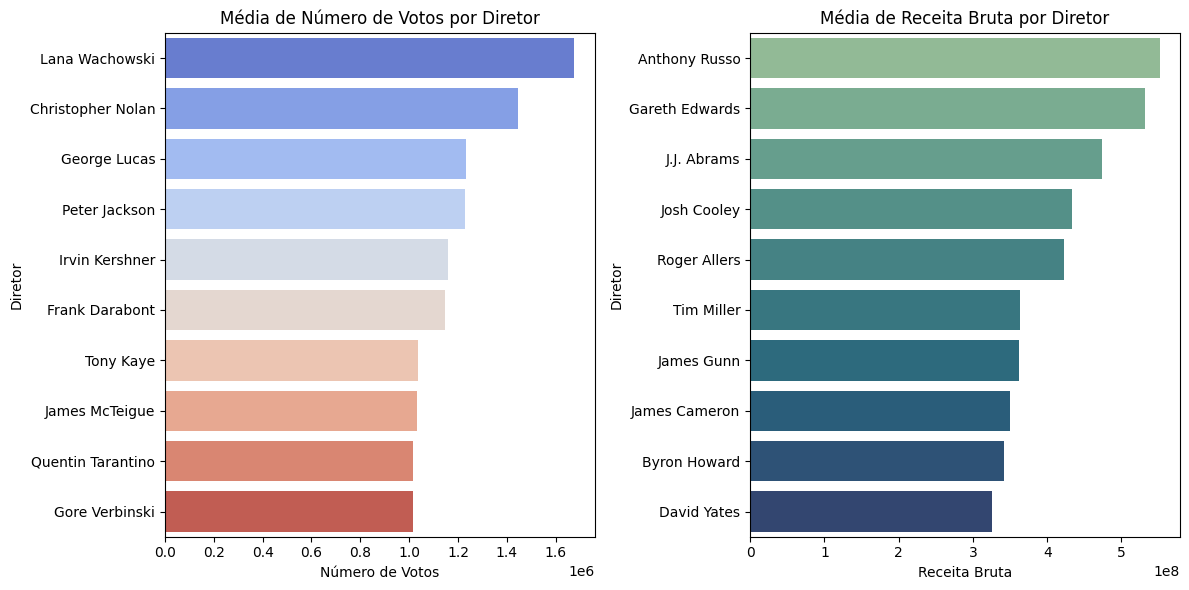

In [10]:
# Média de receita bruta por diretor
mean_gross_by_director = df.groupby('Director')['Gross'].mean().sort_values(ascending=False)

# Diretores com maior numero de votos
most_voted_directors = df.groupby('Director')['No_of_Votes'].mean().sort_values(ascending=False)

# visualizacao da distribuicao de diretores e media de receita bruta
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax1 = sns.barplot(x=most_voted_directors.head(10).values, y=most_voted_directors.head(10).index, ax=axs[0], palette='coolwarm')
ax1.set_title('Média de Número de Votos por Diretor')
ax1.set_xlabel('Número de Votos')
ax1.set_ylabel('Diretor')

ax2 = sns.barplot(x=mean_gross_by_director.head(10).values, y=mean_gross_by_director.head(10).index, ax=axs[1], palette='crest')
ax2.set_title('Média de Receita Bruta por Diretor')
ax2.set_xlabel('Receita Bruta')
ax2.set_ylabel('Diretor')

plt.tight_layout()

plt.show()

* **Atores Principais**:

Os atores com as maiores receitas médias são: Daisy Ridley, John Boyega, Chris Evans, Sam Worthington, Michelle Rodriguez, Chris Hemsworth, Billy Zane, Kathy Bates, Jeremy Renner, Ruffalo. Grandes parte desses atores são conhecidos por atuar em filmes de grandes fraquias, como Star Wars, Avatar e Vingadores. Essas franquias são conhecidas pelos fãs do gênero de ação, aventura e ficção científica.

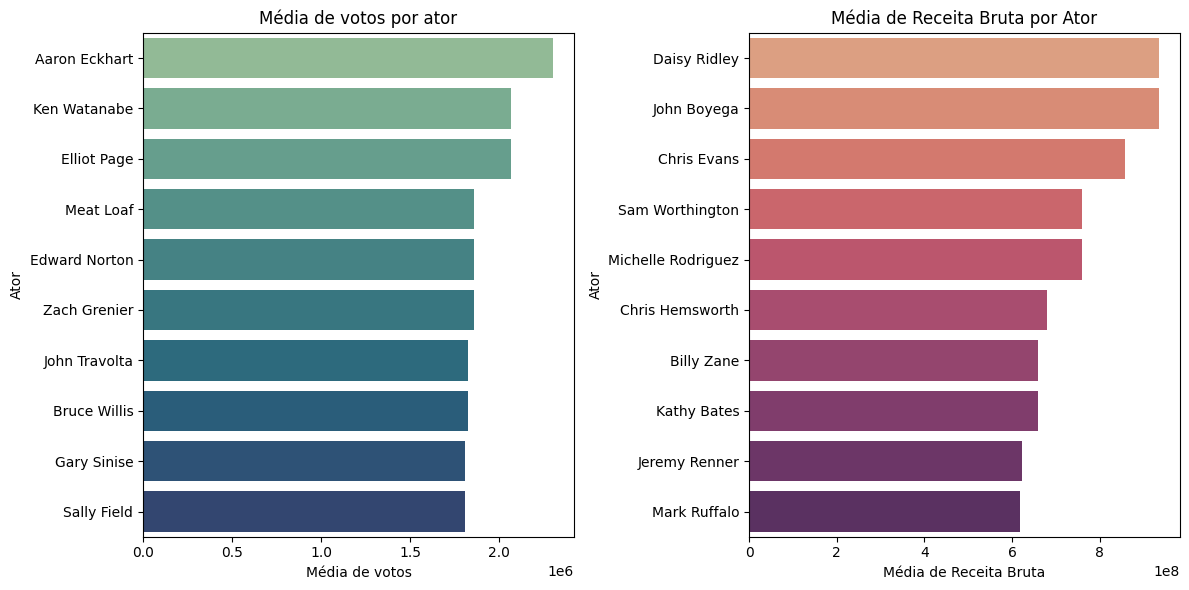

In [11]:
# Distribuição de estrelas (colunas 'Star1', 'Star2', 'Star3', 'Star4')
stars = ['Star1', 'Star2', 'Star3', 'Star4']
star_distribution = pd.concat([df[star] for star in stars]).value_counts()
# Receita bruta média por estrela
mean_gross_by_star = pd.concat([df.groupby(star)['Gross'].mean() for star in stars]).sort_values(ascending=False)

# media de votos por ator
mean_votes_by_star = pd.concat([df.groupby(star)['No_of_Votes'].mean() for star in stars]).sort_values(ascending=False)

# Visualização da distribuição de estrelas e média de receita bruta
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax1 = sns.barplot(x=mean_votes_by_star.head(10).values, y=mean_votes_by_star.head(10).index, ax=axs[0], palette='crest')
ax1.set_title('Média de votos por ator')
ax1.set_xlabel('Média de votos')
ax1.set_ylabel('Ator')


ax2 = sns.barplot(x=mean_gross_by_star.head(10).values, y=mean_gross_by_star.head(10).index, ax=axs[1], palette='flare')
ax2.set_title('Média de Receita Bruta por Ator')
ax2.set_xlabel('Média de Receita Bruta')
ax2.set_ylabel('Ator')

plt.tight_layout()
plt.show()

* **Gênero**:

Os gêneros com as maiores receitas médias são: Family, Sci-Fi, Action, Adventure, Fantasy, Family, Fantasy, Comedy, Thriller, Animation e Crime. Tais dados estão em conformidade com as análises anteriores, que indicam que filmes de ação, aventura, ficção científica e fantasia tendem a ter um alto potencial de lucratividade.

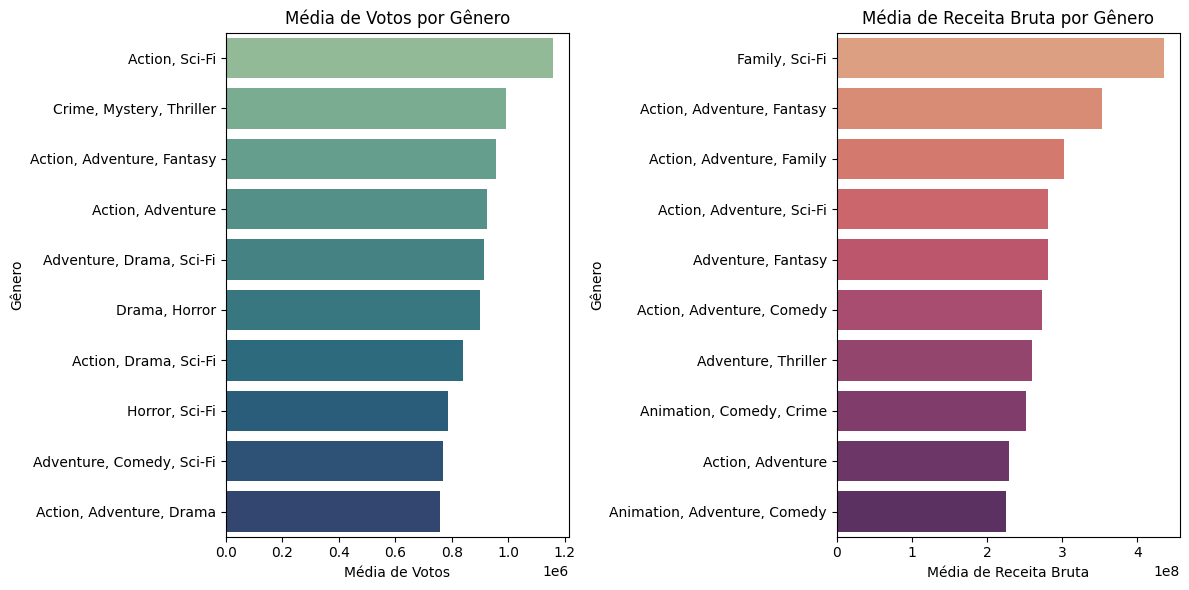

In [12]:
# Distribuição de gêneros
genre_distribution = df['Genre'].value_counts()

# Receita bruta média por gênero
mean_gross_by_genre = df.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

# Média de votos por Gênero
mean_votes_by_genre = df.groupby('Genre')['No_of_Votes'].mean().sort_values(ascending=False)

# Correlação entre a receita bruta média por gênero e a média de votos
genre_correlation = pd.concat([mean_gross_by_genre, mean_votes_by_genre], axis=1).corr().iloc[0, 1]

# Visualização da distribuição de gêneros e média de receita bruta
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
ax1 = sns.barplot(x=mean_votes_by_genre.head(10).values, y=mean_votes_by_genre.head(10).index, ax=axs[0], palette='crest')
ax1.set_title('Média de Votos por Gênero')
ax1.set_xlabel('Média de Votos')
ax1.set_ylabel('Gênero')

ax2 = sns.barplot(x=mean_gross_by_genre.head(10).values, y=mean_gross_by_genre.head(10).index, ax=axs[1], palette='flare')
ax2.set_title('Média de Receita Bruta por Gênero')
ax2.set_xlabel('Média de Receita Bruta')
ax2.set_ylabel('Gênero')

plt.tight_layout()
plt.show()

* **Classificação**:

As classificações com maior receita foram UA (permitido a partir de 12 anos), A (adultos), U (sem restrições). Dentre estes, o que obteve maior receita média foi UA, sugerindo que filmes com essa classificação tem potencial para gerar interesse de uma grande parcela da população, inclusive adulta, e, consequentemente, gerar altas receitas.

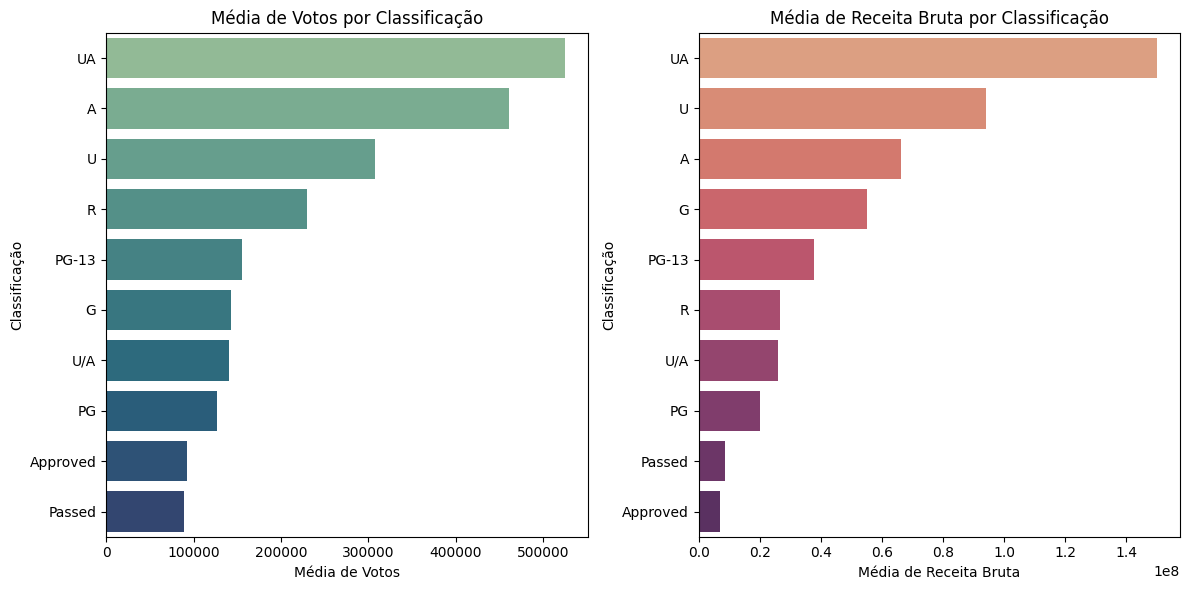

In [13]:
# Receita bruta média por classificação
mean_gross_by_rating = df.groupby('Certificate')['Gross'].mean().sort_values(ascending=False)

# Média de votos por classificação
mean_votes_by_rating = df.groupby('Certificate')['No_of_Votes'].mean().sort_values(ascending=False)

# visualização da distribuição de classificações e média de receita bruta
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico de barras
ax1 = sns.barplot(x=mean_votes_by_rating.head(10).values, y=mean_votes_by_rating.head(10).index, ax=axs[0], palette='crest')
ax1.set_title('Média de Votos por Classificação')
ax1.set_xlabel('Média de Votos')
ax1.set_ylabel('Classificação')

ax2 = sns.barplot(x=mean_gross_by_rating.head(10).values, y=mean_gross_by_rating.head(10).index, ax=axs[1], palette='flare')
ax2.set_title('Média de Receita Bruta por Classificação')
ax2.set_xlabel('Média de Receita Bruta')
ax2.set_ylabel('Classificação')

plt.tight_layout()
plt.show()

* **Duração do Filme:**

Filmes com duração entre 150-180 minutos recebem a maior média de votos, indicando que essa duração é ideal para manter o interesse e o envolvimento do público. Em relação à lucratividade, filmes com duração entre 180-210 minutos têm a maior média de receita bruta, sugerindo que esses filmes são extremamente lucrativos. No entanto, é importante equilibrar a duração para não perder o engajamento do público, como observado na diminuição de votos para essa categoria.

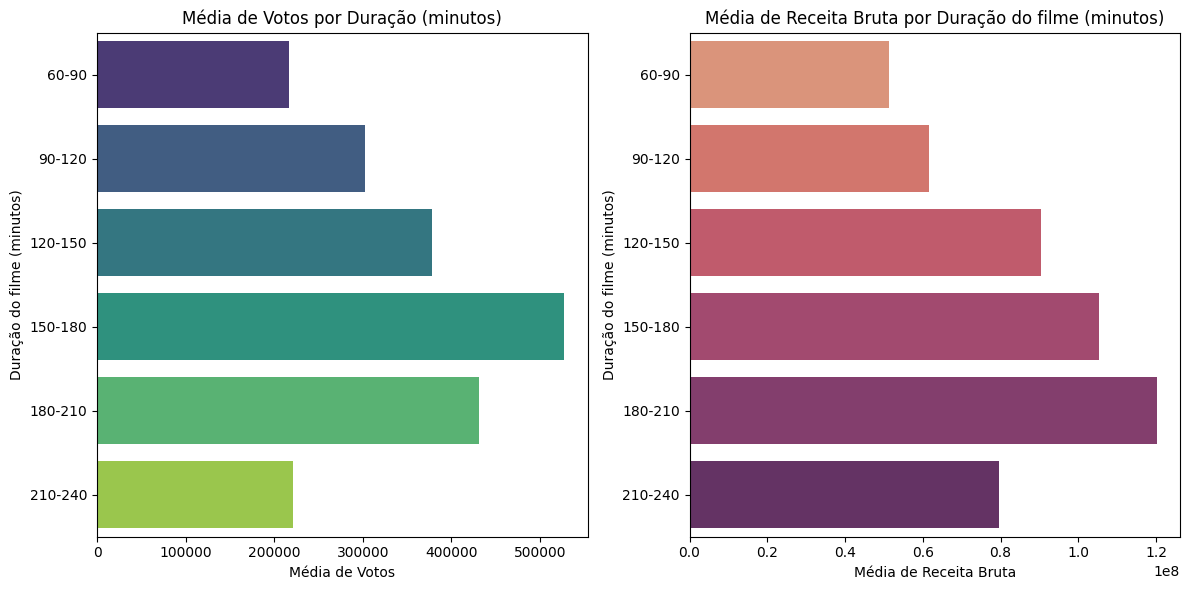

In [14]:
# Estratificação dos filmes por duração

# Definir os intervalos de duração
bins =  [60, 90, 120, 150, 180, 210, 240]
# Definir os labels dos intervalos
labels = ['60-90', '90-120', '120-150', '150-180', '180-210', '210-240']


# Criar a coluna 'Runtime_Group' com base nos intervalos de duração
df['Runtime_Group'] = pd.cut(df['Runtime'], bins=bins, labels=labels, right=False)

# Receita bruta média por intervalo de duração
mean_gross_by_runtime_group = df.groupby('Runtime_Group')['Gross'].mean().sort_values(ascending=False)

# Média de votos por intervalo de duração
mean_votes_by_runtime_group = df.groupby('Runtime_Group')['No_of_Votes'].mean().sort_values(ascending=False)

# excluir coluna criada
df.drop(columns='Runtime_Group', inplace=True)

# Visualização da distribuição de intervalos de duração e média de receita bruta
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
ax1 = sns.barplot(x=mean_votes_by_runtime_group.values, y=mean_votes_by_runtime_group.index, ax=axs[0], palette='viridis')
ax1.set_title('Média de Votos por Duração (minutos)')
ax1.set_xlabel('Média de Votos')
ax1.set_ylabel('Duração do filme (minutos)')

ax2 = sns.barplot(x=mean_gross_by_runtime_group.values, y=mean_gross_by_runtime_group.index, ax=axs[1], palette='flare')
ax2.set_title('Média de Receita Bruta por Duração do filme (minutos)')
ax2.set_xlabel('Média de Receita Bruta')
ax2.set_ylabel('Duração do filme (minutos)')

plt.tight_layout()
plt.show()


***

### 4. Recomendações 

**Recomendações para Produção de Filmes com Alta Expectativa de Receita**
Com base nas análises realizadas, que evidenciaram uma correlação entre filmes mais votados e um melhor retorno financeiro, é possível concluir que a popularidade de um filme está associada ao seu potencial de lucratividade. A seguir, apresentamos recomendações detalhadas para a produção de filmes com alta expectativa de receita:

##### **Gênero**
Recomenda-se focar nos seguintes gêneros, que têm demonstrado alto potencial de lucratividade:

* Filmes para a família
* Ficção científica
* Ação
* Aventura
* Fantasia
* Comédia
* Suspense
* Animação
* Crime/Policial

##### **Diretores**

* Anthony Russo
* Gareth Edwards
* J.J. Abrams
* Josh Cooley
* Roger Allers
* Tim Miller
* James Gunn
* James Cameron
* Lana Wachowski
* Christopher Nolan
* George Lucas
* Peter Jackson
* Steven Spielberg
* Martin Scorsese

##### **Atores Principais**

* Daisy Ridley
* John Boyega
* Chris Evans
* Sam Worthington
* Michelle Rodriguez
* Chris Hemsworth
* Billy Zane
* Kathy Bates
* Jeremy Renner
* Mark Ruffalo
* Aaron Eckhart
* Ken Watanabe
* Elliot Page
* Edward Norton


##### **Classificação Indicativa**

UA (permitido a partir de 12 anos)
A (adultos)
U (sem restrições)

#####  **Duração do Filme**

Produzir filmes com duração entre 150-180 minutos, pois tendem a atrair mais votos e manter uma boa receita bruta. Considerar filmes de duração entre 180-210 minutos para produções épicas ou franquias estabelecidas, onde o público está disposto a investir mais tempo, resultando em alta receita bruta.

***

### 5. Conclusão

O planejamento estratégico antes da produção de um projeto cinematográfico é etapa essencial para aumentar as chances do filme ter uma alta expectativa de retorno financeiro. As recomendações  fornecidas por esta análise são fundamentadas em análises estatísticas rigorosas e evidenciam a importância de considerar múltiplos fatores para maximizar o sucesso de um filme, portanto, implementar tais recomendações pode proporcionar uma vantagem competitiva no mercado altamente dinâmico e competitivo do entretenimento cinematográfico.


---
---

## Modelo para previsao da nota IBMD

### Importação de bibliotecas

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pickle

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


### Treinamento e Avaliação do Modelo

In [16]:
# Preparação dos dados
df_teste = df.copy()
# df_teste.drop(columns=['Released_Year'], inplace=True)

# Encoding das variáveis categóricas
df_encoded = pd.get_dummies(df_teste, columns=['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Released_Year'])

# Separar variáveis independentes e dependentes
X = df_encoded.drop(columns=['IMDB_Rating', 'Movies_Title', 'Overview'])
y = df_encoded['IMDB_Rating']

# Features do modelo
model_features = X.columns

# Divisão dos dados em conjuntos de treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)       # 60% para treino, 40% para temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 20% para validação e 20% para teste 

# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever a nota IMDB no conjunto de validação
y_val_pred = model.predict(X_val)

# Avaliar o modelo no conjunto de validação
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = model.score(X_val, y_val)
print(f'''
      Avaliação do modelo de previsão de notas IMDB 
      
      ** Conjunto de Validação:
      Erro médio quadrático (conjunto de teste): {mse_val}
      R2 (teste): {r2_val}
''')

# Avaliar o modelo no conjunto de teste
y_test_pred = model.predict(X_test)

# Avaliação do modelo no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = model.score(X_test, y_test)
print(f'''
       ** Conjunto de Teste:      
      Erro médio quadrático (conjunto de teste): {mse_test}
      R2 (teste): {r2_test}
''')


      Avaliação do modelo de previsão de notas IMDB 
      
      ** Conjunto de Validação:
      Erro médio quadrático (conjunto de teste): 0.030829971086785868
      R2 (teste): 0.6213873082324156


       ** Conjunto de Teste:      
      Erro médio quadrático (conjunto de teste): 0.04359553682424782
      R2 (teste): 0.5026804201100965



### Salvar o modelo em arquivo .pkl

In [17]:
filename = 'Modelo_previsao_IMDB.pkl'

with open(filename, 'wb') as file:
      pickle.dump(model, file)

### Pré-processamento dos dados a serem analisados

In [18]:
def preparar_para_previsao(filme_dict, model_features):
    """ 
    Função para preparar os dados de um novo filme para previsão da nota IMDB
    
    """
    # Criar um dataframe com os dados do novo filme
    new_data = pd.DataFrame([filme_dict])

    # Renomear coluna de titulos
    new_data.rename(columns={'Series_Title': 'Movies_Title'}, inplace=True)

    # Preparacao dos dados numéricos
    new_data['Runtime'] = new_data['Runtime'].str.replace(' min', '').astype(int)
    new_data['Gross'] = new_data['Gross'].str.replace(',', '')
    new_data['Gross'] = new_data['Gross'].astype(int)

    # Encoding das variáveis categóricas
    new_data_encoded = pd.get_dummies(new_data, columns=['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Released_Year'])
    
    # Reindexar o dataframe com as colunas do modelo e preencher com zeros as colunas ausentes
    new_data_encoded = new_data_encoded.reindex(columns=model_features, fill_value=0)
       
    return new_data_encoded

### Previsão da nota IBMD do filme fornecido no desafio

In [19]:
film_to_test = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

new_film = preparar_para_previsao(film_to_test, model_features)

#prever a nota IMDB do novo filme
new_film_pred = model.predict(new_film)
print(f'Nota IMDB prevista para o novo filme: {new_film_pred[0]:.2f}')

Nota IMDB prevista para o novo filme: 9.43


***
***
## Respostas às perguntas do desafio

1.	**Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!**
R - A análise exploratória dos dados foi realizada e pode ser consultada ao início deste notebook.

2.	Responda também às seguintes perguntas:
a.	**Qual filme você recomendaria para uma pessoa que você não conhece?**
R - A indicação de um filme é um processo complexo por envolve a subjetividade do indivíduo e seus gostos pessoais. A indicação com a maior probabilidade de agradar uma pessoa desconhecida seria um filme com alta avaliação no IMDB, uma alta pontuação no Metacritic, uma grande quantidade de votos e uma receita bruta significativa. no dataset avaliado, o filme com maior popularidade, associado ao numero de votos foi Dark Knight. Seria essa a minha indicação para uma pessoa desconhecida.

b.	**Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?** 
R - De acordo com as análises realizadas, filmes com gênero de ação, aventura, ficção científica e fantasia tendem a ter um alto potencial de lucratividade. Além disso, a popularidade do diretor, dos atores principais e a classificação indicativa do filme, bem como a duração também são fatores importantes que influenciam a receita bruta.

c.	**Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**
R -  A coluna Overview fornece informações valiosas acerca do enredo do filme, o que pode ser útil para identificar padrões em relação ao gênero do filme.  Uma análise do texto pode revelar palavras-chave, ou seja, que aparecem com uma maior frequência,  que, com uso de técnicas complexas de processamento de linguagem natural, poderiam ser utilizadas para inferir o gênero do filme.

3.	Explique como você faria a previsão da nota do imdb a partir dos dados. 
	**Quais variáveis e/ou suas transformações você utilizou e por quê?**
	As variáveis utilizadas para prever a nota do IMDB foram: Numéricas (Released_Year, Runtime, Meta_score, No_of_Votes, Gross) e Categóricas (Certificate, Genre, Director, Star1, Star2, Star3, Star4). AS variáveis categóricas precisaram ser transformadas em variáveis numéricas para serem utilizadas no modelo de regressão. Para isso, foi utilizada a técnica de codificação com o método 'get_dummies' da biblioteca Pandas, que transforma variáveis categóricas em vetores binários.

	**Qual tipo de problema estamos resolvendo (regressão, classificação)?** 
	R - Para realizar uma previsão de uma variável métrica, como é o caso do IMDB_Rating, é necessário utilizar um modelo de regressão. Modelos de classificação são mais adequadas para lidar com variáveis categóricas.

	**Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**
	Modelos comparados: Linear Regression, CatBoost Regressor.

	Linear Regression tem como pontos a favor a sua simplicidade, facilidade de interpretação, eficiência computacional. Em contrapartida tem como pontos negativos a suposição de linearidade, sensibilidade a outliers e a incapacidade de capturar relações não-lineares. 
	
	Já o CatBoost Regressor lida bem com dados categóricos, lida com overfitting e tem boa performance. Entretanto, é mais complexo, necessida de maior tempo para treinamento e requer ajuste de hiperparâmetros.
	
	O modelo com melhor performance para os dados fornecidos foi o Linear Regression, que apresentou um MSE de 0.043 e um R2 de 0.51 no conjunto de testes.

	**Qual medida de performance do modelo foi escolhida e por quê?** 
	R - Foram avaliadas duas medidas de performance para o modelo de previsão da nota do IMDB: Mean Squared Error (MSE) e R2 Score. O MSE é uma medida de erro que penaliza mais fortemente os erros maiores, enquanto o R2 Score é uma medida de ajuste que indica a proporção da variabilidade da variável dependente que é explicada pelo modelo. A escolha foi realizada com base na interpretabilidade bem como na abrangência da avaliação do modelo.
	

4.	**Supondo um filme com as seguintes características:**

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

**Qual seria a nota do IMDB?**
A nota obtida para o filme 'The Shawshank Redemption' foi de __9.43__. 

5.	Salve o modelo desenvolvido no formato .pkl. 

6.	A entrega deve ser feita através de um repositório de código público que contenha:
a.	README explicando como instalar e executar o projeto OK

b.	Arquivo de requisitos com todos os pacotes utilizados e suas versões OK
c.	Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2. OK
d.	Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook). OK
e.	Arquivo .pkl conforme passo 5 acima. OK

Todos os códigos produzidos devem seguir as boas práticas de codificação.

In [20]:
# arquivo readme
with open('README.md', 'w') as file:
    file.write('''
    # Desafio Indicium - IMDB
    
    Este é um projeto de análise de dados e previsão de notas de filmes do IMDB.
    
    ## Instalação
    
    Para instalar as dependências, execute o comando:
    
    ```
    pip install -r requirements.txt
    ```
    
    ## Execução
    
    Para executar o notebook localmente, execute o comando:
                        
    
    ## Autor
    
    [Evandro Cnha] 
    ''')


